## Used Car Example

Data: Based on Used Car data from https://www.kaggle.com/code/satyaprakashshukl/used-car-price-prediction/notebook

## IMPORT LIBRARIES

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## IMPORT DATA-SETS

In [4]:
uc_audi = pd.read_csv("audi.csv")
uc_bmw = pd.read_csv("bmw.csv")
uc_ford = pd.read_csv("ford.csv")

## EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
uc_audi.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


In [6]:
uc_audi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


In [7]:
uc_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

In [8]:
uc_audi.describe()

,year,price,mileage,tax,mpg,engineSize
count,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000,10668.000000
mean,2017.100675,22896.685039,24827.244001,126.011436,50.770022,1.930709
std,2.167494,11714.841888,23505.257205,67.170294,12.949782,0.602957
min,1997.000000,1490.000000,1.000000,0.000000,18.900000,0.000000
25%,2016.000000,15130.750000,5968.750000,125.000000,40.900000,1.500000
50%,2017.000000,20200.000000,19000.000000,145.000000,49.600000,2.000000
75%,2019.000000,27990.000000,36464.500000,145.000000,58.900000,2.000000
max,2020.000000,145000.000000,323000.000000,580.000000,188.300000,6.300000


In [9]:
uc_audi.shape

(10668, 9)

In [11]:
def skalenniveau_bestimmen(uc_audi):
    if uc_audi.dtype == 'object':  # Kategorische Daten
        # Falls es nur wenige eindeutige Werte gibt, könnte es Nominal oder Ordinal sein.
        unique_values = uc_audi.nunique()
        if unique_values <= 10:
            return "Nominal (kategorisch)"
        else:
            return "Ordinal (Reihenfolge vorhanden)"
    
    elif pd.api.types.is_numeric_dtype(uc_audi):
        if (uc_audi.min() == 0) and (uc_audi.max() > 0):  # Echte Null vorhanden (Verhältnisskala)
            return "Verhältnisskala"
        else:  # Intervalldaten
            return "Intervallskala"
    
    return "Unklar"

# Beispiel anwenden
print('model', skalenniveau_bestimmen(uc_audi['model']))  # Nominal
print('year', skalenniveau_bestimmen(uc_audi['year']))  # Verhältnisskala
print('price', skalenniveau_bestimmen(uc_audi['price']))  # Ordinal
print('transmission', skalenniveau_bestimmen(uc_audi['transmission']))  # Verhältnisskala
print('mileage', skalenniveau_bestimmen(uc_audi['mileage']))  # Verhältnisskala
print('fuelType', skalenniveau_bestimmen(uc_audi['fuelType']))  # Verhältnisskala
print('tax', skalenniveau_bestimmen(uc_audi['tax']))  # Verhältnisskala
print('mpg', skalenniveau_bestimmen(uc_audi['mpg']))  # Verhältnisskala
print('engineSize', skalenniveau_bestimmen(uc_audi['engineSize']))  # Verhältnisskala

model Ordinal (Reihenfolge vorhanden)
year Intervallskala
price Intervallskala
transmission Nominal (kategorisch)
mileage Intervallskala
fuelType Nominal (kategorisch)
tax Verhältnisskala
mpg Intervallskala
engineSize Verhältnisskala


In [12]:
uc_audi.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [14]:
uc_audi["engineSize"]=uc_audi["engineSize"].replace(0,np.nan)
uc_audi["tax"]=uc_audi["tax"].replace(0,np.nan)

In [15]:
uc_audi.dropna( inplace = True)

In [16]:
uc_audi.duplicated().sum()

np.int64(96)

In [17]:
uc_audi.drop_duplicates(inplace=True)

## VISUALIZATIONS

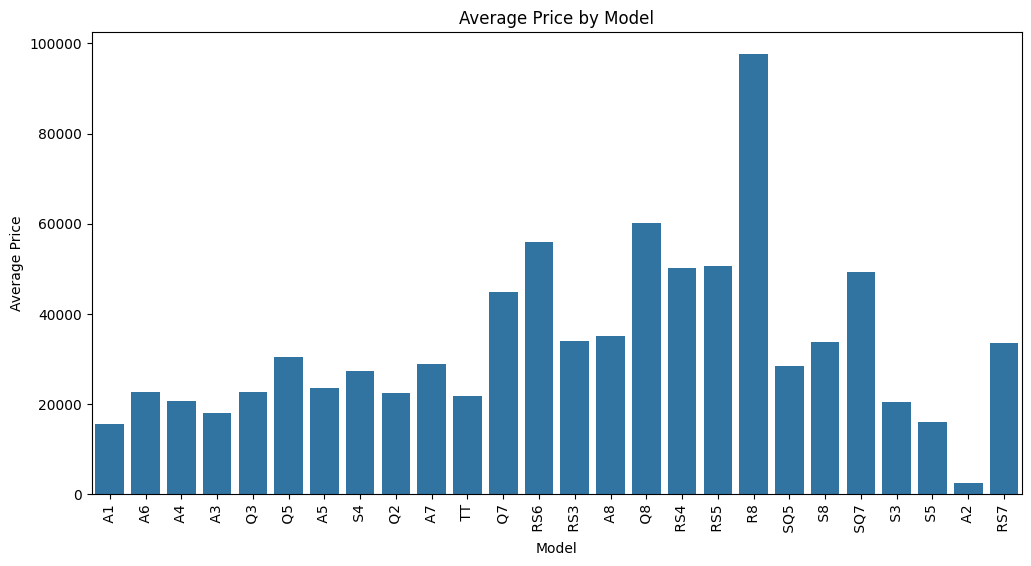

In [18]:
plt.figure(figsize=(12, 6))
sns.barplot(x='model', y='price', data=uc_audi[:10000], errorbar=None)
plt.title('Average Price by Model')
plt.xlabel('Model')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  
plt.show()

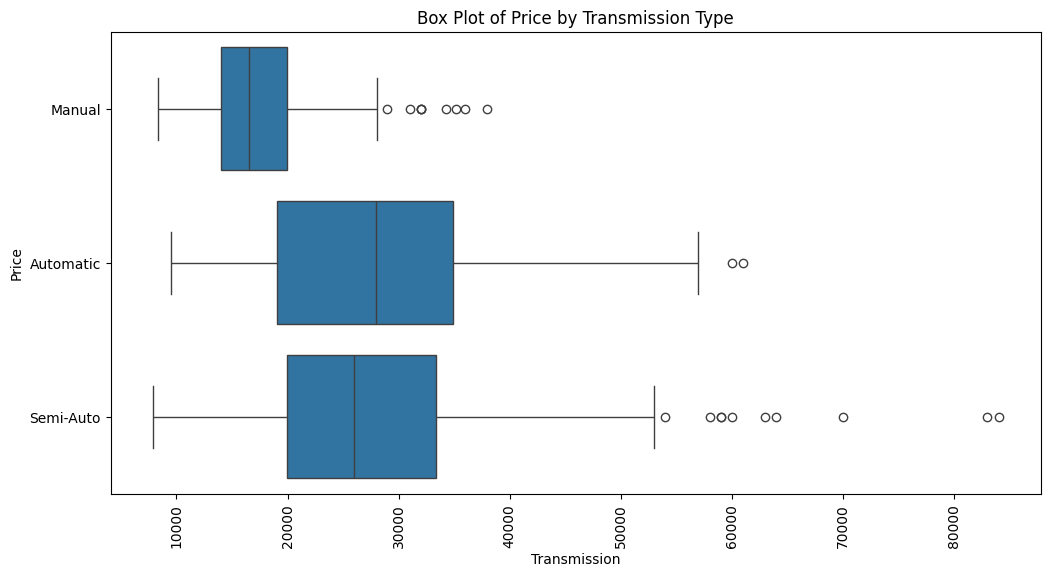

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='price', y='transmission', data=uc_audi[:1000],orient='h')
plt.title('Box Plot of Price by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.xticks(rotation=90) 
plt.show()

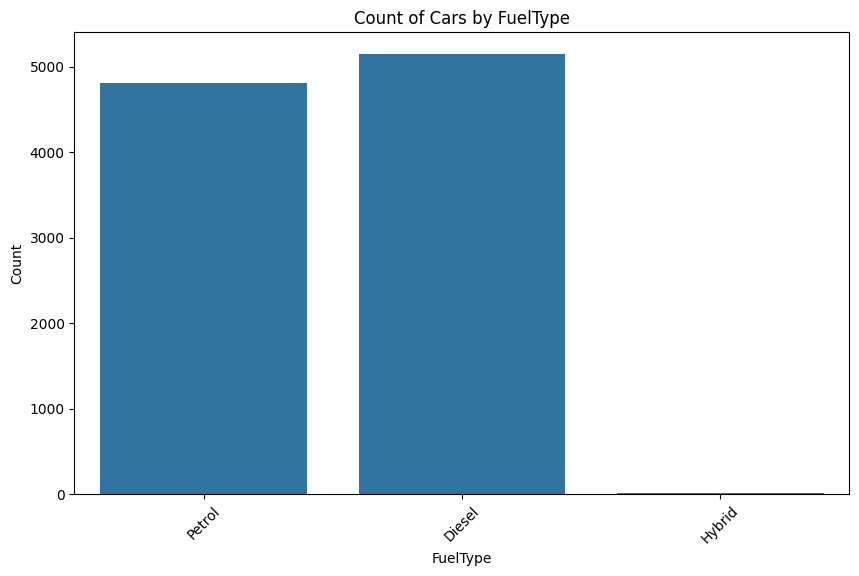

In [20]:
plt.figure(figsize=(10, 6))
sns.countplot(x='fuelType', data=uc_audi)
plt.title('Count of Cars by FuelType')
plt.xlabel('FuelType')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [21]:
uc_audi.columns

Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize'],
      dtype='object')

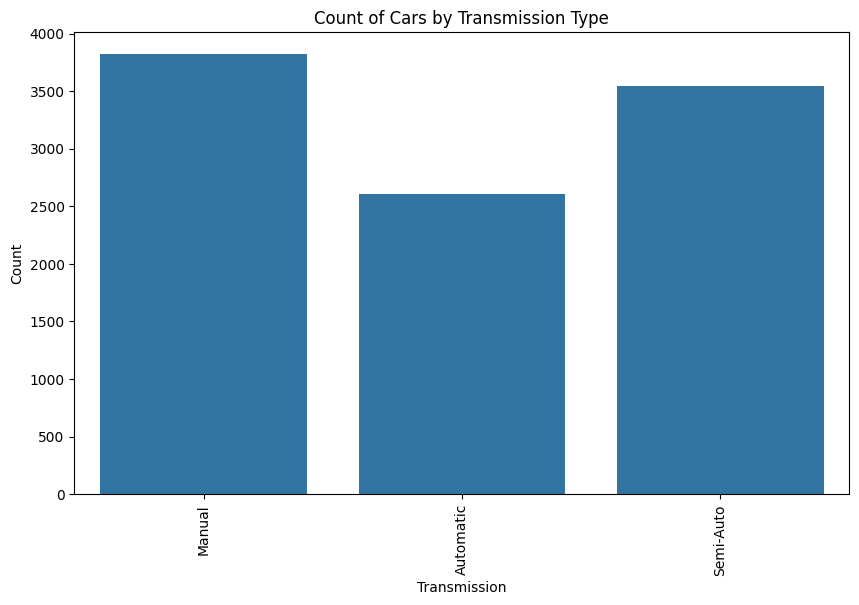

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(x='transmission', data=uc_audi)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

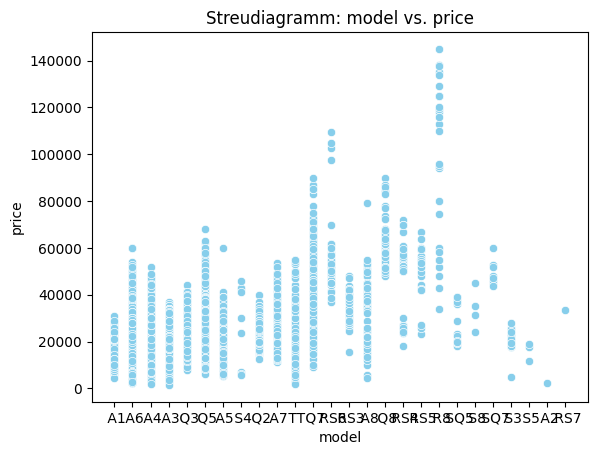

In [23]:
import seaborn as sns

# Streudiagramm mit seaborn erstellen
sns.scatterplot(data=uc_audi, x='model', y='price', color='skyblue')

# Titel hinzufügen
plt.title('Streudiagramm: model vs. price')

# Diagramm anzeigen
plt.show()

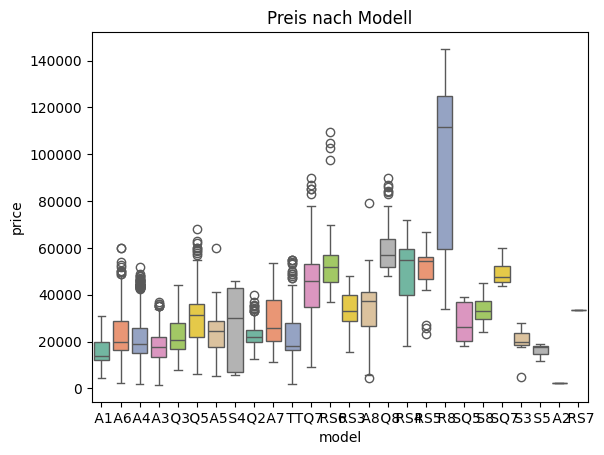

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot erstellen mit hue anstelle von palette
sns.boxplot(x='model', y='price', data=uc_audi, hue='model', palette='Set2', legend=False)

# Titel hinzufügen
plt.title('Preis nach Modell')

# Diagramm anzeigen
plt.show()

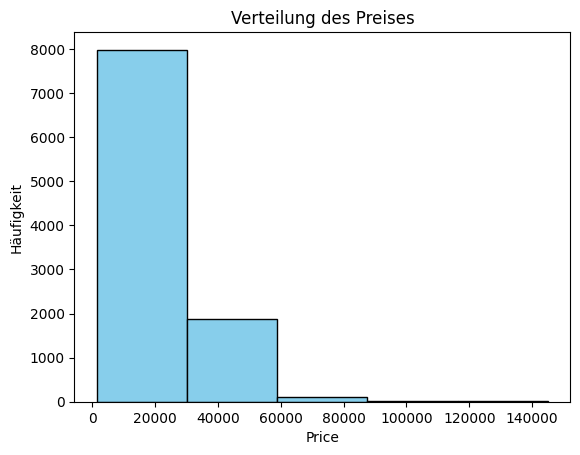

In [26]:
# Histogramm estellen

uc_audi['price'].plot(kind='hist', bins=5, color='skyblue', edgecolor='black')

# Titel und Achsenbezeichner hinzufügen
plt.title('Verteilung des Preises')
plt.xlabel('Price')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()

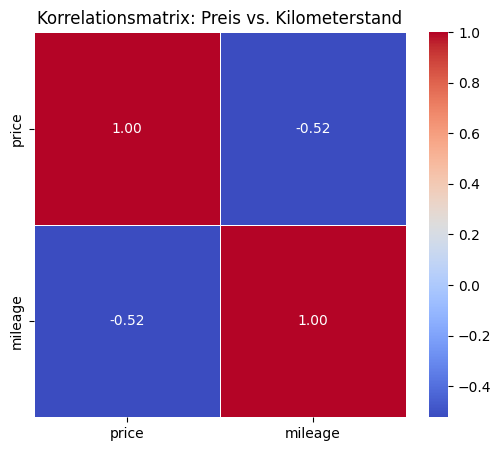

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Korrelationsmatrix für price und mileage berechnen
correlation_matrix = uc_audi[['price', 'mileage']].corr()

# Heatmap der Korrelationsmatrix erstellen
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Titel hinzufügen
plt.title('Korrelationsmatrix: Preis vs. Kilometerstand')

# Diagramm anzeigen
plt.show()

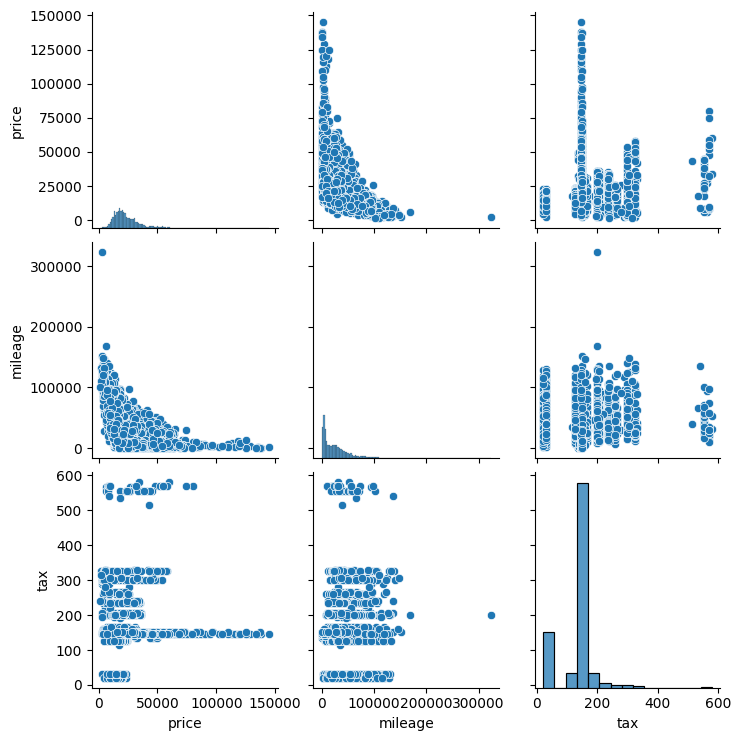

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pairplot für price und mileage
sns.pairplot(uc_audi[['price', 'mileage', 'tax']])

# Diagramm anzeigen
plt.show()

C:\Users\charb\AppData\Local\Temp\ipykernel_11364\3341407716.py:42: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


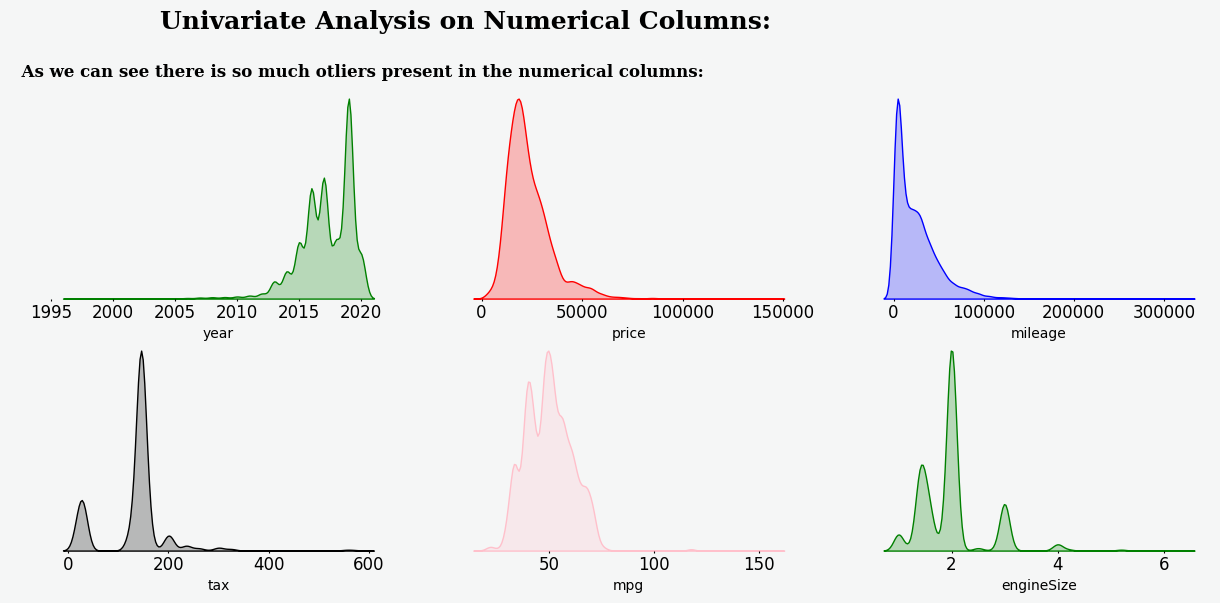

In [38]:
fig =  plt.figure(figsize = (15,6))
fig.patch.set_facecolor('#f5f6f6')


                                                   
gs = fig.add_gridspec(2,3)
gs.update(wspace=0.2,hspace= 0.2)

ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[0,2])
ax3 = fig.add_subplot(gs[1,0])
ax4 = fig.add_subplot(gs[1,1])
ax5 = fig.add_subplot(gs[1,2])

axes=[ax0,ax1,ax2,ax3,ax4,ax5]
for ax in axes:
    ax.set_facecolor('#f5f6f6')
    ax.tick_params(axis='x',
                   labelsize = 12, which = 'major',
                   direction = 'out',pad = 2,
                   length = 1.5)
    ax.tick_params(axis='y', colors= 'black')
    ax.axes.get_yaxis().set_visible(False)
    
    for loc in ['left', 'right', 'top', 'bottom']:
        ax.spines[loc].set_visible(False)


        
cols = uc_audi.select_dtypes(exclude = 'object').columns

sns.kdeplot(x = uc_audi[cols[0]],color="green",fill=True,ax = ax0)
sns.kdeplot(x = uc_audi[cols[1]],color="red",fill=True,ax = ax1)
sns.kdeplot(x = uc_audi[cols[2]],color="blue",fill=True,ax = ax2)
sns.kdeplot(x = uc_audi[cols[3]],color="black",fill=True,ax = ax3)
sns.kdeplot(x = uc_audi[cols[4]],color="pink",fill=True,ax = ax4)
sns.kdeplot(x = uc_audi[cols[5]],color="green",fill=True,ax = ax5)

fig.text(0.2,0.98,"Univariate Analysis on Numerical Columns:",**{'font':'serif', 'size':18,'weight':'bold'}, alpha = 1)
fig.text(0.1,0.90,"  As we can see there is so much otliers present in the numerical columns:",**{'font':'serif', 'size':12,'weight':'bold'}, alpha = 1)
fig.show()